In [77]:
import pandas as pd
from urllib.request import urlretrieve

In [2]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [3]:
type(covid_df)

pandas.core.frame.DataFrame

In [4]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [6]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [7]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [8]:
covid_df.columns[1]

'new_cases'

In [9]:
covid_df.shape

(248, 4)

In [10]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [11]:
covid_df.at[246, 'new_cases']

975.0

In [12]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [13]:
covid_df.new_cases[246]

975.0

In [14]:
cases_df = covid_df[['date','new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [15]:
covid_df_copy = covid_df.copy()

In [16]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [17]:
covid_df.head(2)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN


In [18]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [19]:
covid_df.at[0,'new_tests']

nan

In [20]:
covid_df.new_tests.first_valid_index()

111

In [21]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [22]:
covid_df.sample(2)

,date,new_cases,new_deaths,new_tests
78,2020-03-18,3526.0,347.0,NaN
42,2020-02-11,0.0,0.0,NaN


In [23]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [24]:
total_cases
total_deaths

35497.0

In [25]:
total_cases

271515.0

In [26]:
total_deaths

35497.0

In [27]:
death_rate = covid_df.new_deaths.sum()/covid_df.new_cases.sum()
death_rate

0.13073679170579894

In [28]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
total_tests

5214766.0

In [29]:
positive_rate = total_cases/total_tests
positive_rate

0.05206657403227681

In [30]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [31]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [32]:
from IPython.display import display
with pd.option_context('display.max_rows',100):
    display(covid_df[covid_df.new_cases>1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [33]:
positive_rate

0.05206657403227681

In [34]:
high_ratio_df = covid_df[covid_df.new_cases/covid_df.new_tests > positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [35]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [36]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [37]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [38]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [39]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [40]:
covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [41]:
covid_df.sort_values('new_deaths',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [42]:
covid_df.sort_values('new_deaths').head(10)

,date,new_cases,new_deaths,new_tests
177,2020-06-25,577.0,-31.0,29421.0
30,2020-01-30,0.0,0.0,NaN
31,2020-01-31,3.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
35,2020-02-04,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [43]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [44]:
covid_df.at[172,'new_cases'] = (covid_df.at[171,'new_cases'] +
                                covid_df.at[172,'new_cases'])/2

In [45]:
covid_df.new_cases[172]

91.5

In [46]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [47]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [48]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [49]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [50]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [57]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_may_totals = covid_df_may_metrics.sum() 

In [58]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [59]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths','new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [60]:
covid_df.new_cases.mean()

1095.7842741935483

In [61]:
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

In [66]:
covid_month_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].sum()

In [67]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8011.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [74]:
covid_mean_df = covid_df.groupby('weekday')[['new_cases','new_deaths','new_tests']].mean()

In [75]:
covid_mean_df

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1192.642857,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [71]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [72]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [73]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

In [76]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN


In [78]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x22ce44252a0>)

In [101]:
locations_df = pd.read_csv('locations.csv')

In [102]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [104]:
italy_df = locations_df[locations_df.location == "Italy"]
italy_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [96]:
covid_df['location'] = "Italy"

In [97]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN,Italy


In [105]:
merged_df = covid_df.merge(locations_df, on="location")

In [106]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [107]:
merged_df['cases_per_million'] = merged_df.total_cases*1e6/merged_df.population

In [108]:
merged_df['deaths_per_million'] = merged_df.total_deaths*1e6/merged_df.population

In [109]:
merged_df['tests_per_million'] = merged_df.total_tests*1e6/merged_df.population

In [128]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267092.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4417.539278,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268457.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4440.115506,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269453.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4456.588709,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270428.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4472.714586,586.998461,NaN


In [130]:
result_df = merged_df[['date',
                       'new_cases',
                       'total_cases',
                       'new_deaths',
                       'total_deaths',
                       'new_tests',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]

In [131]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267092.5,1.0,35473.0,53541.0,5117788.0,4417.539278,586.700753,84644.943252
244,2020-08-31,1365.0,268457.5,4.0,35477.0,42583.0,5160371.0,4440.115506,586.766910,85349.238862
245,2020-09-01,996.0,269453.5,6.0,35483.0,54395.0,5214766.0,4456.588709,586.866146,86248.897403
246,2020-09-02,975.0,270428.5,8.0,35491.0,NaN,NaN,4472.714586,586.998461,NaN


In [132]:
result_df.to_csv('results.csv', index=None)

<Axes: >

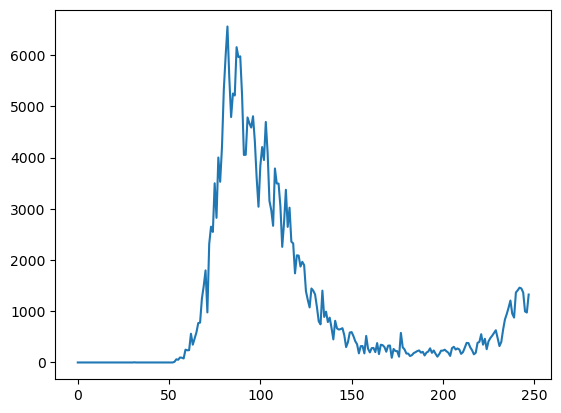

In [133]:
 result_df.new_cases.plot()

In [134]:
result_df.set_index('date', inplace=True)

<Axes: xlabel='date'>

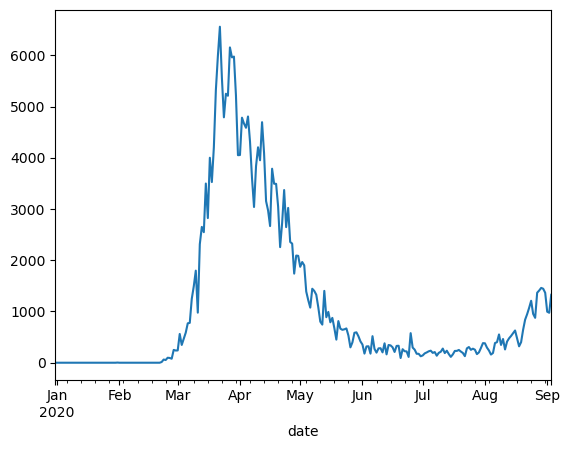

In [135]:
result_df.new_cases.plot()

In [136]:
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.694535e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.456589e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

<Axes: xlabel='date'>

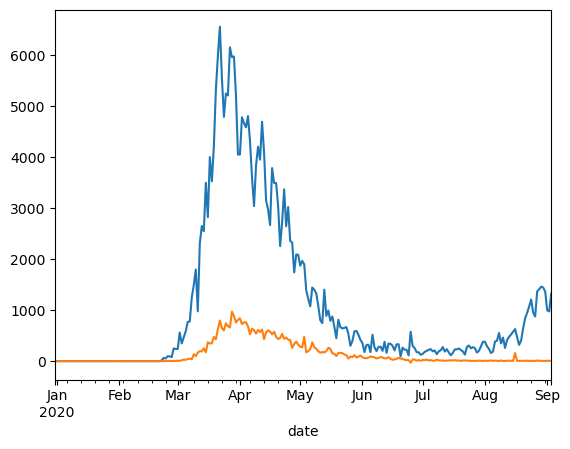

In [137]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

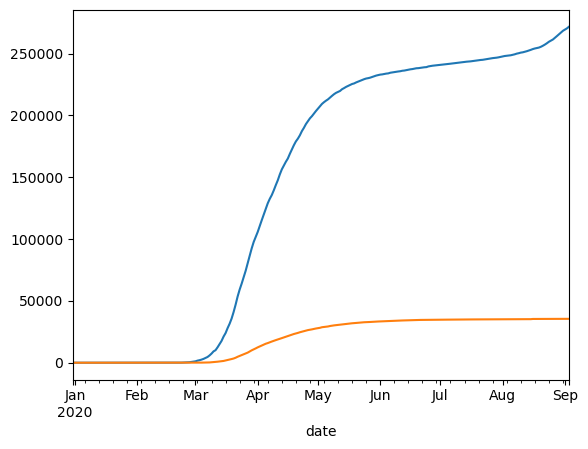

In [138]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

In [139]:
death_rate = result_df.total_deaths/result_df.total_cases

<Axes: title={'center': 'Death Rate'}, xlabel='date'>

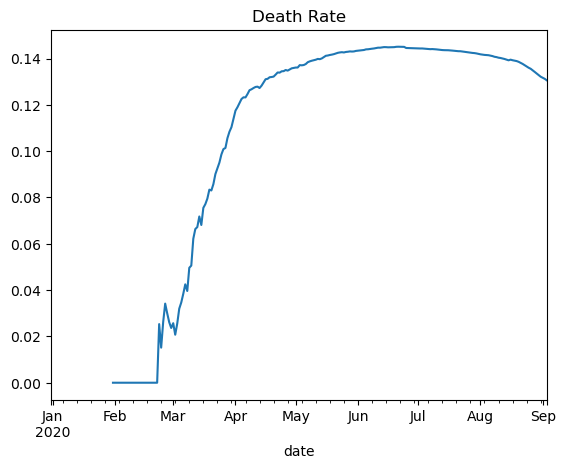

In [140]:
death_rate.plot(title='Death Rate')

<Axes: title={'center': 'Positive Rate'}, xlabel='date'>

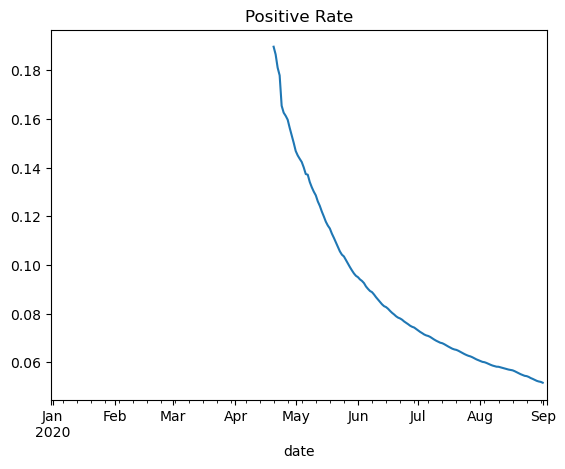

In [142]:
positive_rates = result_df.total_cases/result_df.total_tests
positive_rates.plot(title='Positive Rate')

<Axes: xlabel='month'>

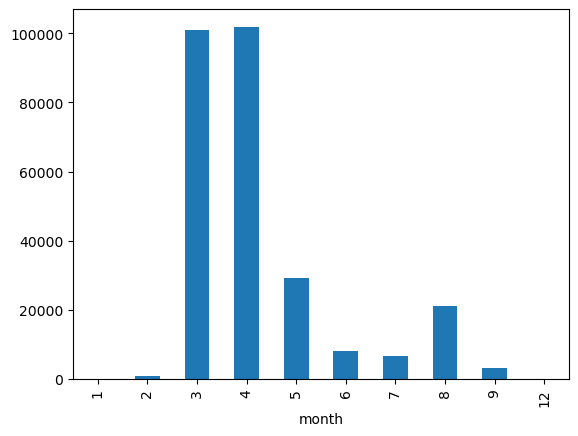

In [144]:
covid_month_df.new_cases.plot(kind='bar')

<Axes: xlabel='month'>

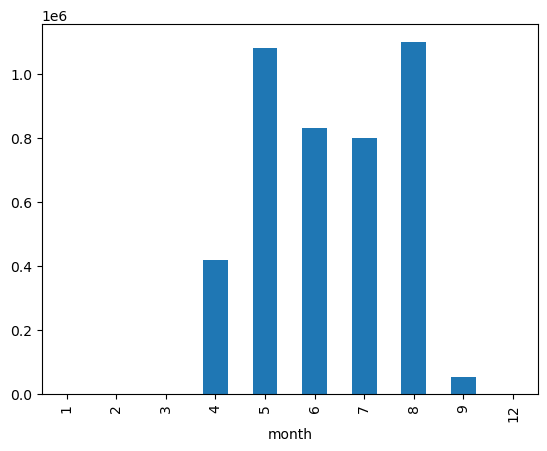

In [145]:
covid_month_df.new_tests.plot(kind='bar')